In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import astropy.io.ascii as asci
from helper import phys
%matplotlib notebook

In [2]:
from helper.specread import get_keck, gaplinelist, get_keck, get_hstspec, get_p200, get_ltspec
from helper.specread import add_telluric_circle, pblines, psudo_cont_norm
from helper.specplot_func import plot_mask_gal_lines
from helper.specconvolve import convolve_with_constant_velocity_kernel
from allsn_info import get_at2019dge

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
fs= 11
matplotlib.rcParams['font.size']=fs

%matplotlib notebook

In [5]:
result = get_at2019dge()
z =result["z"]
t0max = result["t_max"]
ebv = result["ebv"]# galactic extinction
lc = result['tb']
lc = lc[lc.instrument!='P60+SEDM']
lcdet = lc.sort_values(by = ['mjd'])

ixhst = (lcdet["tmax_of"].values < 12.5)&(lcdet["tmax_of"].values > 11.5)
lchst = lcdet[ixhst]

dt5 = get_hstspec(z=z)
wave = dt5['wave_rest'][:-30]
flux = dt5['spec_obs0'][:-30]
flux_norm = psudo_cont_norm(wave, flux)

yaolist = gaplinelist(z=0)
H_list = yaolist['H_list']
FeII_list = yaolist['FeII_list']
HeI_list = yaolist['HeI_list']
HeII_list = yaolist['HeII_list']
OIII_list = yaolist['OIII_list']
OII_list = yaolist['OII_list']
OI_list = yaolist['OI_list']
SIII_list = yaolist['SIII_list']
SII_list = yaolist['SII_list']
NII_list = yaolist['NII_list']
CaII_list = yaolist['CaII_list']
NeIII_list = yaolist['NeIII_list']
ArIII_list = yaolist["ArIII_list"]
MgII_list = yaolist["MgII_list"]
MgI_list = yaolist["MgI_list"]

In [6]:
dt2 = get_p200(z=z, vkernel = 500)
dt8 = get_keck(z=z, date = "20200218_Keck1_v2", vkernel = 200)

<IPython.core.display.Javascript object>


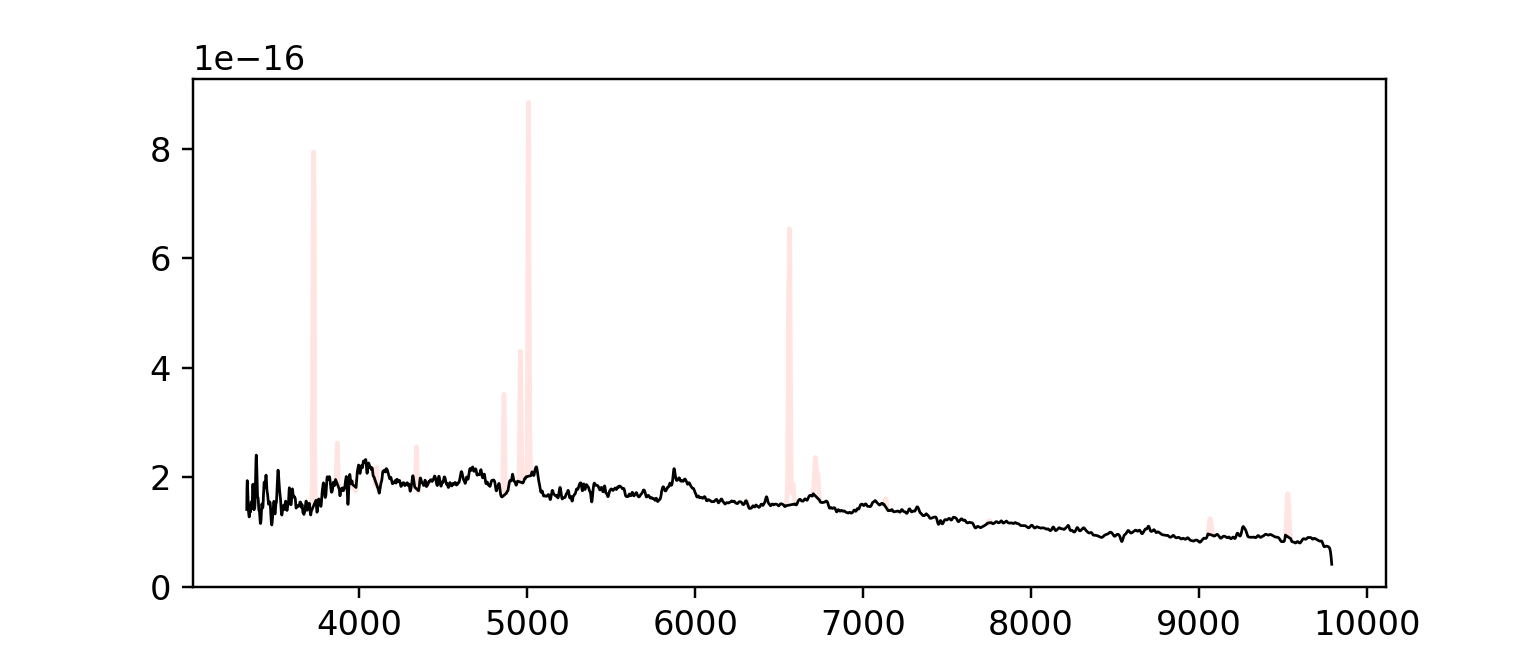

In [7]:
plt.figure(figsize=(7,3))
ax = plt.subplot(111)
wave_dbsp, flux_dbsp = plot_mask_gal_lines(ax, dt2['wave_con'], dt2['spec_con'], plotfinal=True, returnfinal=True)
#wave_lris, flux_lris = plot_mask_gal_lines(ax, dt8['wave_con'], dt8['spec_con']-2e-16, plotfinal=True, returnfinal=True)
flux_norm_dbsp = psudo_cont_norm(wave_dbsp, flux_dbsp)

## Comparison: Optical region
Helium rich. Similar to Type Ib/IIb SNe

In [8]:
sp1 = pd.read_csv("../data/otherSN/SN2005bf/phase3_4") 
sp4 = pd.read_csv("../data/otherSN/SN2008ax/phase13") 
sp5 = pd.read_csv("../data/otherSN/SN2002bj/phase4") 
sp6 = pd.read_csv("../data/otherSN/SN2010al/phase9") 
sp7 = pd.read_csv("../data/otherSN/SN2011hw/phase10_2011-11-28.ascii", sep=' ') 

In [9]:
sp21 = np.loadtxt("../data/otherSN/PTF12os/SN2012P_2012-01-26_00-00-00_Mayall_RC-Spec_PTF.ascii").T
sp22 = np.loadtxt("../data/otherSN/PTF12os/SN2012P_2012-01-18_00-00-00_P200_DBSP_PTF.flm").T
sp23 = np.loadtxt("../data/otherSN/PTF12os/SN2012P_2012-02-02_00-00-00_Lick-3m_KAST_PTF.ascii").T
sp24 = np.loadtxt("../data/otherSN/PTF12os/SN2012P_2012-02-20_00-00-00_Keck1_LRIS_PTF.flm").T

In [10]:
sp31 = np.loadtxt("../data/otherSN/iPTF13bvn/iPTF13bvn_2013-06-27_03-51-05_APO-3.5m_DIS_iPTF.ascii").T
sp32 = np.loadtxt("../data/otherSN/iPTF13bvn/iPTF13bvn_2013-07-01_00-00-00_HET_HET-LRS_iPTF.ascii").T
sp33 = np.loadtxt("../data/otherSN/iPTF13bvn/iPTF13bvn_2013-07-05_00-00-00_P200_DBSP_iPTF_0.ascii").T
sp34 = np.loadtxt("../data/otherSN/iPTF13bvn/iptf13bvn_2013-07-11_08-28-19_Keck2_DEIMOS_UCB-SNDB_0.flm").T

In [11]:
# maximum light is MJD = 56629.2 (Dec 03 2013)
# +8 day
sp81 = np.loadtxt("../data/otherSN/LSQ13ddu/LSQ13ddu_2013-12-11_01-32-45_ESO-NTT_EFOSC2-NTT_PESSTO-SSDR.dat").T
sp82 = np.loadtxt("../data/otherSN/LSQ13ddu/LSQ13ddu_2013-12-11_05-37-16_ESO-NTT_EFOSC2-NTT_PESSTO-SSDR.dat").T 

In [12]:
sp9 = pd.read_csv("../data/otherSN/Pastorello2015a/LSQ13ccw/phase6") 
sp10 = pd.read_csv("../data/otherSN/Pastorello2015a/LSQ12btw/phase16") 
sp11 = np.loadtxt("../data/otherSN/SN2000er/2000er_2000-11-30_00-00-00_ESO-3.6m_EFOSC2-3.6_None.ascii") 
sp12 = np.loadtxt("../data/otherSN/iPTF14aki/iPTF14aki_2014-04-26_00-29-00_NOT_ALFOSC_None.ascii") 

In [13]:
sp13 = np.loadtxt("../data/otherSN/iPTF14aki/CSS140421-142042p031602_2014-05-01_03-24-49_ESO-NTT_EFOSC2-NTT_PESSTO-SSDR.dat")
sp14 = np.loadtxt("../data/otherSN/iPTF14aki/iPTF14aki_2014-05-05_01-25-35_ESO-NTT_EFOSC2-NTT_None.ascii")
sp15 = np.loadtxt("../data/otherSN/iPTF16hgs/SN2016hgs_2016-10-26_00-00-00_P200_DBSP_iPTF.ascii")
sp16 = np.loadtxt("../data/otherSN/iPTF16hgs/SN2016hgs_2016-10-31_06-59-56_Keck1_LRIS_iPTF_0.ascii")

In [14]:
# SN2005bf, read observed wavelength, need to shift to rest wavelength
wv1, fl1 = sp1["wavelength"].values[50:]/(1+0.018913), sp1["flux"].values[50:]

# PTF12os, read observed wavelength, need to shift to rest wavelength, 
wv21, fl21 = sp21[0]/(1+0.00449), sp21[1]
wv22, fl22 = sp22[0]/(1+0.00449), sp22[1]
wv23, fl23 = sp23[0]/(1+0.00449), sp23[1]
wv24, fl24 = sp24[0]/(1+0.00449), sp24[1]

# iPTF13bvn, read observed wavelength, need to shift to rest wavelength
wv31, fl31 = sp31[0]/(1+0.00449), sp31[1]
wv32, fl32 = sp32[0]/(1+0.00449), sp32[1]
wv33, fl33 = sp33[0]/(1+0.00449), sp33[1]
wv34, fl34 = sp34[0]/(1+0.00449), sp34[1]


# SN2008ax, read observed wavelength, need to shift to rest wavelength
wv4, fl4 = sp4["wavelength"].values/(1+0.001931), sp4["flux"].values

# SN2002bj, read observed wavelength, need to shift to rest wavelength
wv5, fl5 = sp5["wavelength"].values/(1+0.012), sp5["flux"].values

# SN2010al, read observed wavelength, need to shift to rest wavelength
wv6, fl6 = sp6["wavelength"].values/(1+0.017155), sp6["flux"].values

# SN2011hw, read observed wavelength, need to shift to rest wavelength
wv7, fl7 = sp7["wavelength"].values/(1+0.023), sp7["flux"].values

# LSQ13ddu, read observed wavelength, need to shift to rest wavelength
wv81, fl81 = sp81[0]/(1+0.058454), sp81[1] +8e-18
wv82, fl82 = sp82[0]/(1+0.058454), sp82[1] 
wv81, fl81 = convolve_with_constant_velocity_kernel(wv81, fl81, 1000)
wv82, fl82 = convolve_with_constant_velocity_kernel(wv82, fl82, 500)

# LSQ13ccw, read observed wavelength, need to shift to rest wavelength
wv9, fl9 = sp9["wavelength"].values/(1+0.0603), sp9["flux"].values

# LSQ12btw, read observed wavelength, need to shift to rest wavelength
wv10, fl10 = sp10["wavelength"].values/(1+0.0571), sp10["flux"].values

# SN2000er, read observed wavelength, need to shift to rest wavelength
wv11, fl11 = sp11[:,0]/(1+0.031), sp11[:,1]

# iPTF14aki, read observed wavelength, need to shift to rest wavelength
wv12, fl12 = sp12[:,0]/(1+0.064), sp12[:,1]
wv13, fl13 = sp13[:,0]/(1+0.064), sp13[:,1]
wv14, fl14 = sp14[:,0]/(1+0.064), sp14[:,1]

# iPTF16hgs
wv15, fl15 = sp15[:,0]/(1+0.017), sp15[:,1]
wv16, fl16 = sp16[:,0]/(1+0.017), sp16[:,1]

In [15]:
ix1 = wv81 > max(wv82)
wv81 = wv81[ix1]
fl81= fl81[ix1]
wv8 = np.hstack([wv82, wv81])
fl8 = np.hstack([fl82, fl81])

In [16]:
flnorm1 = psudo_cont_norm(wv1, fl1)
flnorm21 = psudo_cont_norm(wv21, fl21)
flnorm22 = psudo_cont_norm(wv22, fl22)
flnorm23 = psudo_cont_norm(wv23, fl23)
flnorm24 = psudo_cont_norm(wv24, fl24)
flnorm31 = psudo_cont_norm(wv31, fl31)
flnorm32 = psudo_cont_norm(wv32, fl32)
flnorm33 = psudo_cont_norm(wv33, fl33)
flnorm34 = psudo_cont_norm(wv34, fl34)
flnorm4 = psudo_cont_norm(wv4, fl4)
flnorm5 = psudo_cont_norm(wv5, fl5)
flnorm6 = psudo_cont_norm(wv6, fl6)
flnorm7 = psudo_cont_norm(wv7, fl7)
flnorm8 = psudo_cont_norm(wv8, fl8)
flnorm9 = psudo_cont_norm(wv9, fl9)
flnorm10 = psudo_cont_norm(wv10, fl10)
flnorm11 = psudo_cont_norm(wv11, fl11)
flnorm12 = psudo_cont_norm(wv12, fl12)
flnorm13 = psudo_cont_norm(wv13, fl13)
flnorm14 = psudo_cont_norm(wv14, fl14)
flnorm15 = psudo_cont_norm(wv15, fl15)
flnorm16 = psudo_cont_norm(wv16, fl16)

In [17]:
FeII_list_vshifted = FeII_list*(1 - 4000 * 1e+5/phys.c)
H_list_vshifted = H_list*(1 - 13500 * 1e+5/phys.c)
HeI_list_vshifted = HeI_list*(1 - 6000 * 1e+5/phys.c)

<IPython.core.display.Javascript object>


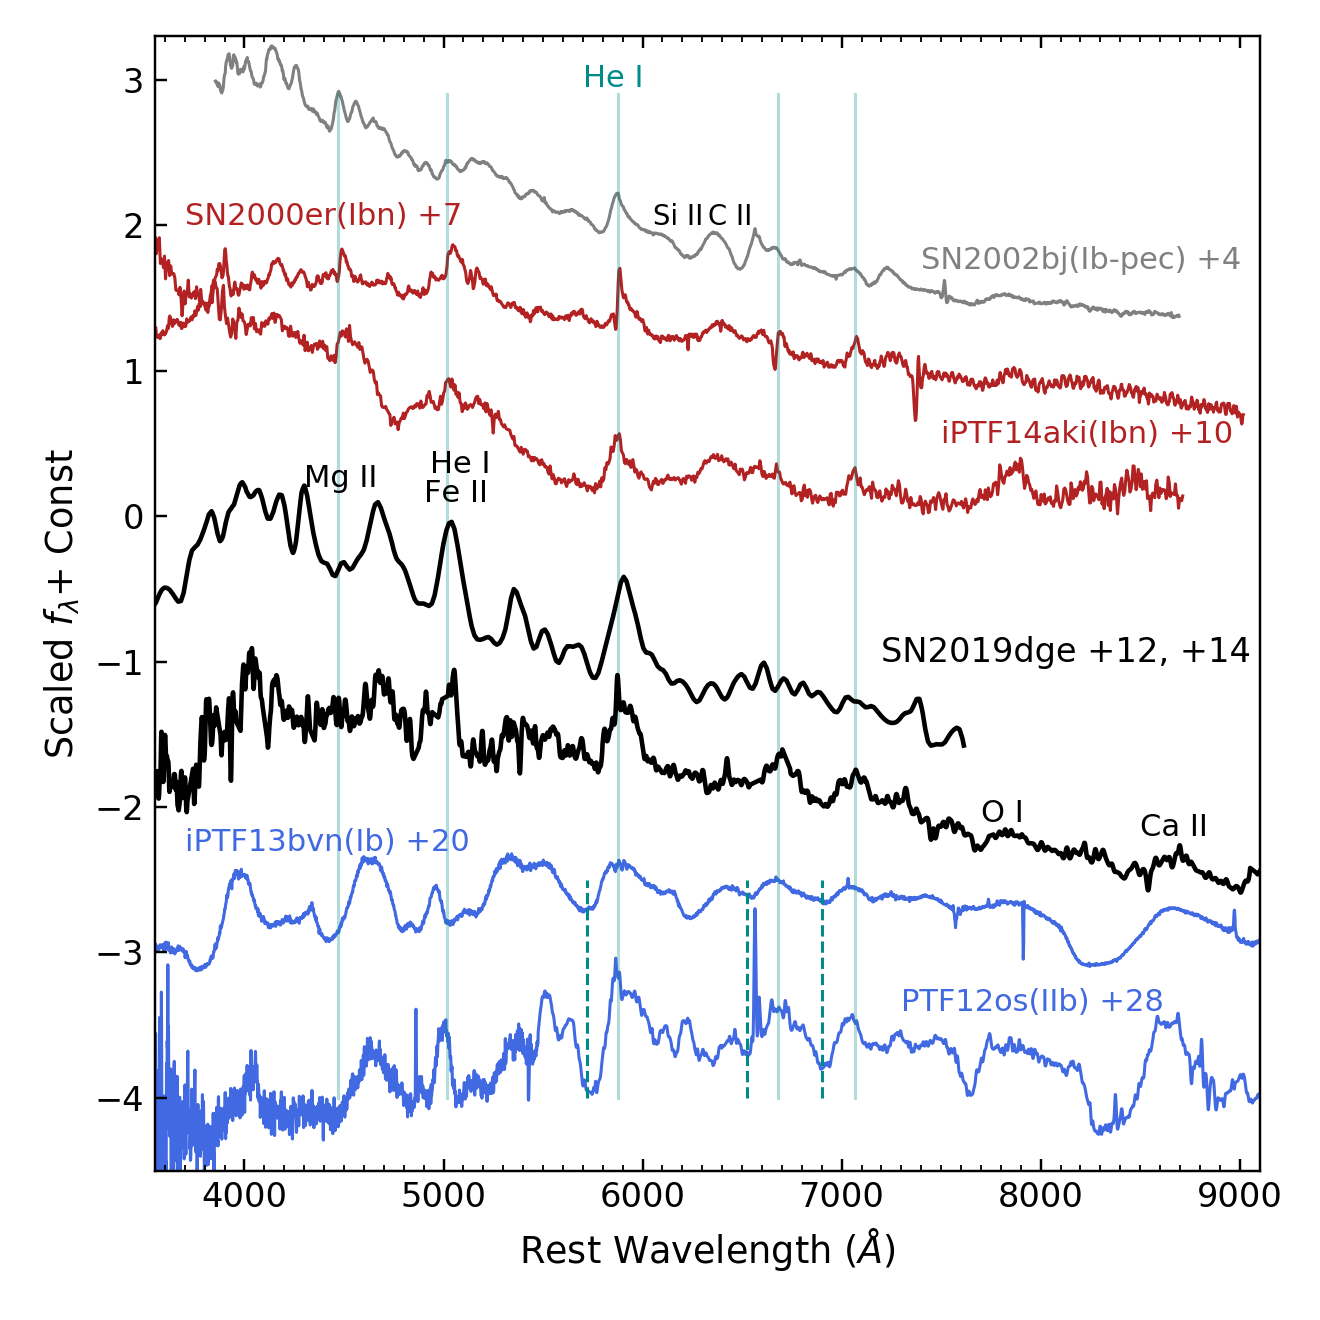

In [20]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
color = "grey"
ax.plot(wv5, flnorm5*1.2+1.,  zorder = 1, color=color, linewidth=1) # rest_wave checked
ax.text(7400, 1.7, "SN2002bj(Ib-pec) +4", color=color, fontsize=fs-1) # type checked
ax.text(6050, 2., "Si II", color = "k", fontsize = fs-2)
ax.text(6330, 2., "C II", color = "k", fontsize = fs-2)

color = "firebrick"
ax.plot(wv11, flnorm11+0.4,  zorder = 1, color=color, linewidth=1) # rest_wave checked
ax.text(3700, 2, "SN2000er(Ibn) +7", color=color, fontsize=fs-1) # type checked

ax.plot(wv13, flnorm13*0.5-0.1,  zorder = 1, color=color, linewidth=1) # rest_wave checked
ax.text(7500, 0.5, "iPTF14aki(Ibn) +10", color=color, fontsize=fs-1) # type checked
ax.text(4900, 0.1, "Fe II", color = "k", fontsize = fs-1)
ax.text(4930, 0.3, "He I", color = "k", fontsize = fs-1)
ax.text(4300, 0.2, "Mg II", color = "k", fontsize = fs-1)

ax.plot(wave, flux_norm-1.8, zorder = 2, color = "k", linewidth=1.5)
ax.plot(wave_dbsp, flux_norm_dbsp*2-3.5, zorder = 2, color = "k", linewidth=1.5)
ax.text(7200, -1., "SN2019dge +12, +14", color="k", fontsize=fs)
ax.text(8500, -2.2, "Ca II", color = "k", fontsize = fs-1)
ax.text(7700, -2.1, "O I", color = "k", fontsize = fs-1)

color = "royalblue"
ax.plot(wv33, flnorm33*0.8-3.2,  zorder = 1, color=color, linewidth=1) # rest_wave checked
ax.text(3700, -2.3, "iPTF13bvn(Ib) +20", color=color, fontsize=fs-1) # type checked

ax.plot(wv23, flnorm23*0.8-4.4,  zorder = 1, color=color, linewidth=1) # rest_wave checked
ax.text(7300, -3.4, "PTF12os(IIb) +28", color=color, fontsize=fs-1) # type checked

tbottom = -4
tup = 2.9
pblines(ax, HeI_list, color='darkcyan', label="He I", tb = tbottom, tu = tup, ls = '-', alpha = 0.3)
#ax.plot([HeI_list[0], HeI_list[-1]], [tup, tup], color = "darkcyan", linewidth = 1, ls = '--', alpha = 0.3)
ax.text(5700, tup+0.05, "He I", color = "darkcyan", fontsize = fs-1)

ww1 = HeI_list[2]*(1 - 8000 * 1e+5/phys.c)
ax.plot([ww1, ww1], [tbottom, -2.5], color='darkcyan', ls = '--', alpha = 1, linewidth=1)

ww1 = HeI_list[3]*(1 - 7000 * 1e+5/phys.c)
ax.plot([ww1, ww1], [tbottom, -2.5], color='darkcyan', ls = '--', alpha = 1, linewidth=1)

ww1 = HeI_list[4]*(1 - 7000 * 1e+5/phys.c)
ax.plot([ww1, ww1], [tbottom, -2.5], color='darkcyan', ls = '--', alpha = 1, linewidth=1)

ax.set_xlabel('Rest Wavelength ('+r'$\AA$'+')',fontsize=fs+1)
ax.set_ylabel('Scaled '+r'$f_{\lambda}$'+'+ Const',fontsize=fs+1)
ax.set_xlim(3550, 9100)
ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
ax.tick_params(which = 'major', length = 4, top=True)
ax.tick_params(which = 'minor', length = 2, top=True)
ax.tick_params(direction='in', axis='both', which = 'both')

ax.set_ylim(-4.5, 3.3)
plt.tight_layout()
plt.savefig("../paper/figures/hst_opt.pdf")

In [39]:
CaII_list

array([3933.66, 3968.47, 7291.47, 7323.89, 8498.02, 8542.09, 8662.14])

## Whole region
There are not many SNe with UV observation. Now compare with all type

In [21]:
sp1 = pd.read_csv("../data/otherSN/SN2011fe/phase4")
sp2 = np.loadtxt("../data/otherSN/Yan2017/phase11/combined")
sp3 = pd.read_csv("../data/otherSN/SN2006jc/uvspec2") # 6.96
sp4 = np.loadtxt("../data/otherSN/SN1993J/uvspec")

In [22]:
wv1, fl1 = sp1["wavelength"].values/(1+0.000804), sp1["flux"].values
wv2, fl2 = sp2[0]/(1+0.1018), sp2[1]
wv3, fl3 = sp3["wavelength"].values/(1+0.005574), sp3["flux"].values
wv4, fl4 = sp4[0]/(1-0.000113), sp4[1]

In [23]:
flnorm1 = psudo_cont_norm(wv1, fl1)
flnorm2 = psudo_cont_norm(wv2, fl2)
flnorm3 = psudo_cont_norm(wv3, fl3)
flnorm4 = psudo_cont_norm(wv4, fl4)

In [24]:
H_list_vshifted = H_list*(1 - 10000 * 1e+5/phys.c)

<IPython.core.display.Javascript object>


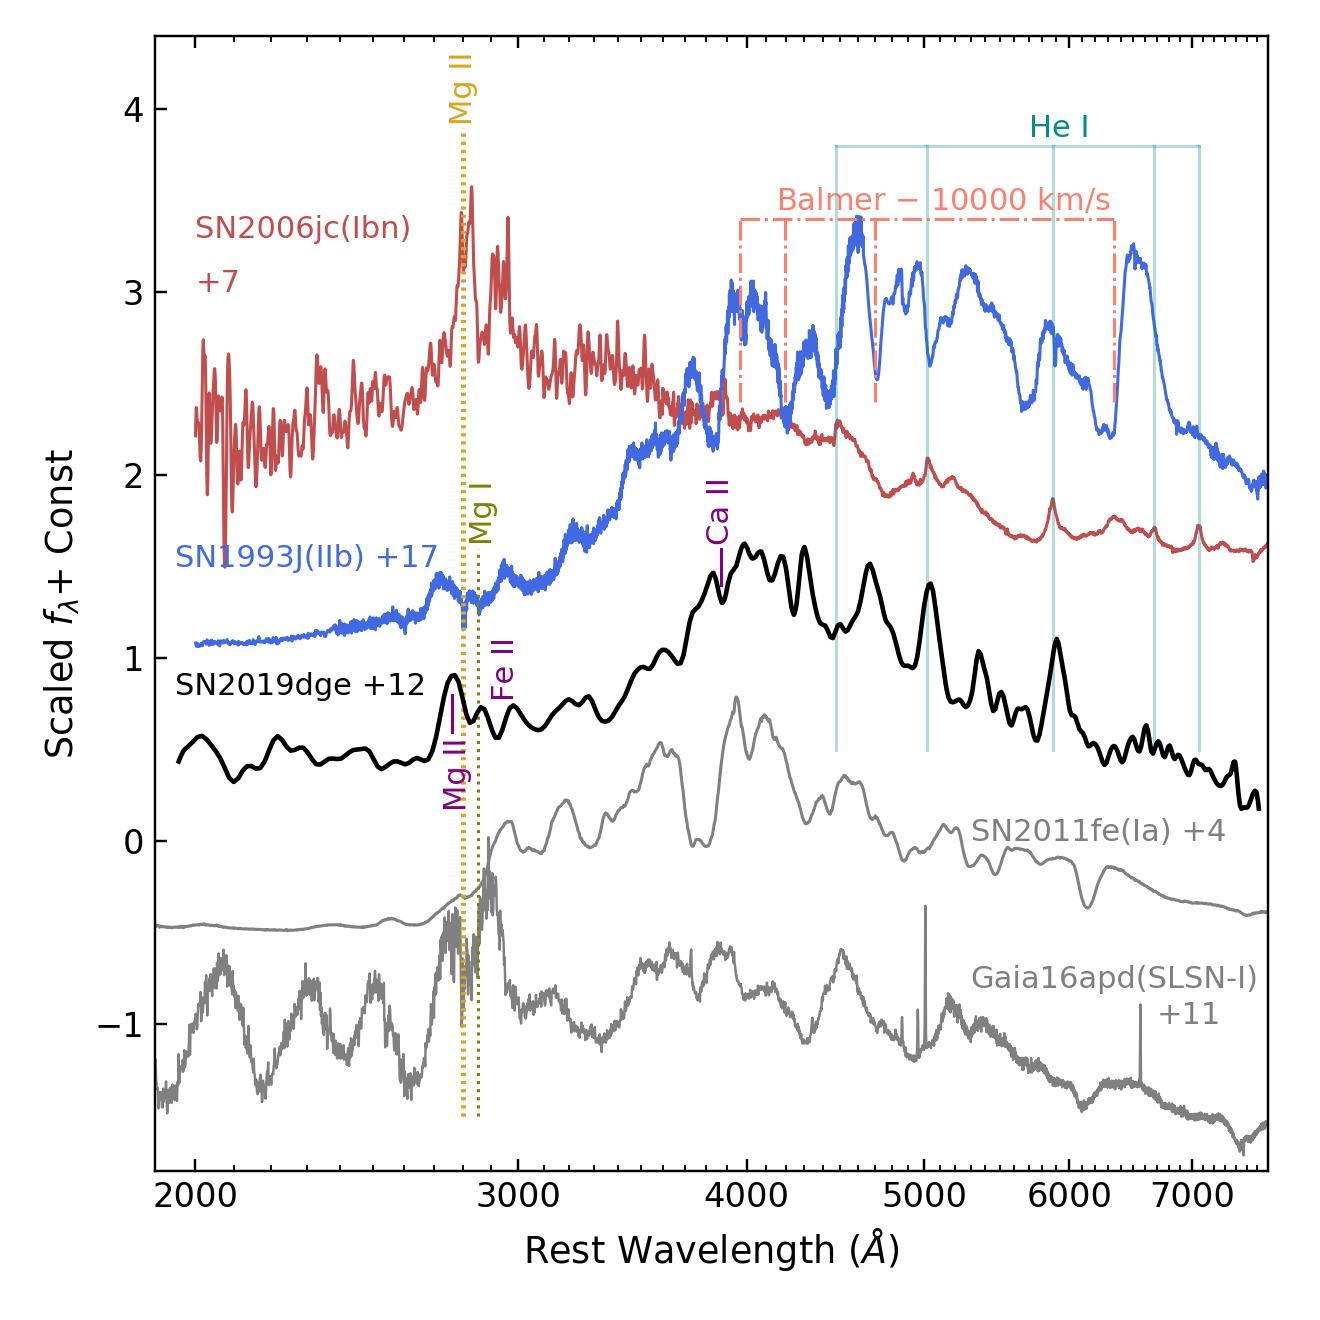

In [25]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
ax.plot(wave, flux_norm*0.8, zorder = 2, color = "k", linewidth=1.5)
ax.text(1950, 0.8, "SN2019dge +12", color="k", fontsize=fs-1)
#ax.text(6900, 1.1, "+12d", color="k")

# color = "springgreen"
color = "grey"
ax.plot(wv1, flnorm1*0.4-0.5,  zorder = 1, color=color, linewidth=1) # rest_wave checked
ax.text(5300, 0., "SN2011fe(Ia) +4", color=color, fontsize=fs-1) # type checked

ax.plot(wv2, flnorm2*0.95-2,  zorder = 1, color=color, linewidth=0.8) # rest_wave checked
ax.text(5300, -0.8, "Gaia16apd(SLSN-I)", color=color, fontsize=fs-1) # type checked
ax.text(6700, -1, "+11", color=color, fontsize=fs-1) # phase checked

color="firebrick"
ax.plot(wv3, flnorm3*0.25+1.5,  zorder = 1, color=color, linewidth=1, alpha = 0.8) # rest_wave checked
ax.text(2000, 3.3, "SN2006jc(Ibn)", color=color, fontsize=fs-1, alpha = 0.8) # type checked
ax.text(2000, 3, "+7", color=color, fontsize=fs-1, alpha = 0.8) # phase checked

color = "royalblue"
ax.plot(wv4, flnorm4*1.9+1.,  zorder = 1, color=color, linewidth=1)
ax.text(1950, 1.5, "SN1993J(IIb) +17", color=color, fontsize=fs-1) # type checked

tbottom = 0.5
tup = 3.8
pblines(ax, HeI_list, color='darkcyan', tb = tbottom, tu = tup, ls = '-', alpha = 0.3)
ax.plot([HeI_list[0], HeI_list[-1]], [tup, tup], color = "darkcyan", linewidth = 1, ls = '-', alpha = 0.3)
ax.text(5700, tup+0.05, "He I", color = "darkcyan", fontsize = fs-1)

tbottom = 2.4
tup = 3.4
pblines(ax, H_list_vshifted[1:], color='salmon', label="O I", tb = tbottom, tu = tup, ls = '-.')
ax.plot([H_list_vshifted[1], H_list_vshifted[-1]], [tup, tup], color = "salmon", linewidth = 1, ls = '-.')
ax.text(4150, tup+0.05, "Balmer $-$ 10000 km/s", color = "salmon", fontsize = fs-1)


tbottom = -1.5
tup = 3.9
color="goldenrod"
pblines(ax, MgII_list, color=color, tb = tbottom, tu = tup, ls = ':')
ax.text(2750, tup+0.05, "Mg II", color = color, fontsize = fs-1, rotation = 90)

color="purple"
tbottom = 1.4
tup = 1.6
pblines(ax, [3870], color=color, tb = tbottom, tu = tup, ls = '-')
ax.text(3800, tup+0.05, "Ca II", color = color, fontsize = fs-1, rotation = 90)

tbottom = 0.6
tup = 0.8
pblines(ax, [2760], color=color, tb = tbottom, tu = tup, ls = '-')
ax.text(2730, tbottom-0.4, "Mg II", color = color, fontsize = fs-1, rotation = 90)
ax.text(2900, tup, "Fe II", color = color, fontsize = fs-1, rotation = 90)

tbottom = -1.5
tup = 1.6
pblines(ax, MgI_list, color='olive', tb = tbottom, tu = tup, ls = ':')
ax.text(2820, tup+0.05, "Mg I", color = "olive", fontsize = fs-1, rotation = 90)

ax.set_xlim(1900, 7700)
ax.set_ylim(-1.8, 4.4)
ax.set_xlabel('Rest Wavelength ('+r'$\AA$'+')',fontsize=fs+1)
ax.set_ylabel('Scaled '+r'$f_{\lambda}$'+'+ Const',fontsize=fs+1)
#"""
ax.semilogx()
ax.xaxis.set_major_locator(matplotlib.ticker.IndexLocator(base=1000, offset = 1000-543))
ax.xaxis.set_minor_locator(matplotlib.ticker.IndexLocator(base=100, offset = 1000-543))
ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(which = 'major', length = 4, top=True, direction = "in")
ax.tick_params(which = 'minor', length = 2, top=True, direction = "in")
ax.set_xticklabels([2000, 3000, 4000, 5000, 6000, 7000])
#"""
plt.tight_layout()
plt.savefig("../paper/figures/hst_all.pdf")